<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [49]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [34]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
print('Downloaded')

Downloaded


In [35]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment
#### Exploratory Data Analysis

In [36]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [37]:
boston_df=boston_df.drop('Unnamed: 0', axis=1)

In [38]:
boston_df.shape

(506, 13)

In [39]:
boston_df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4


In [40]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [41]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

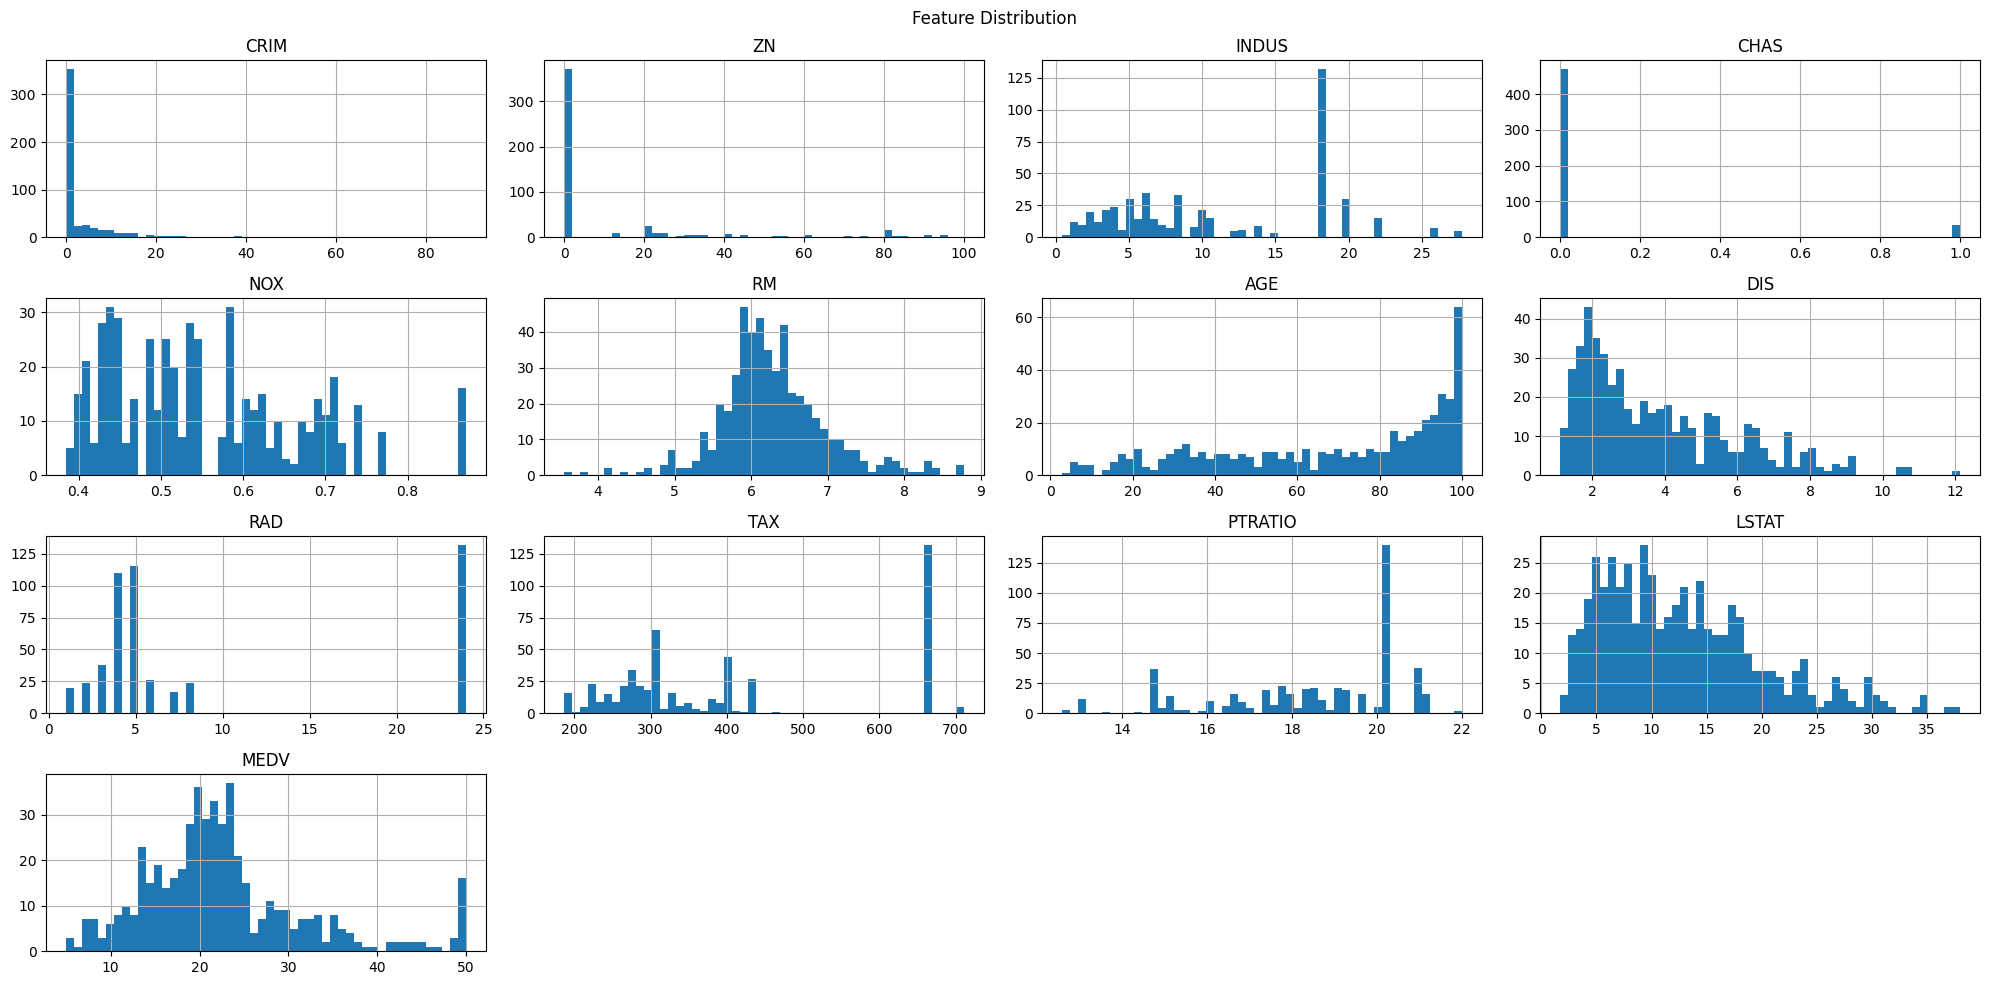

In [50]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', ha='center', fontsize='large')
plt.tight_layout()
plt.show()

#### Task 2: Generate Descriptive Statistics and Visualizations

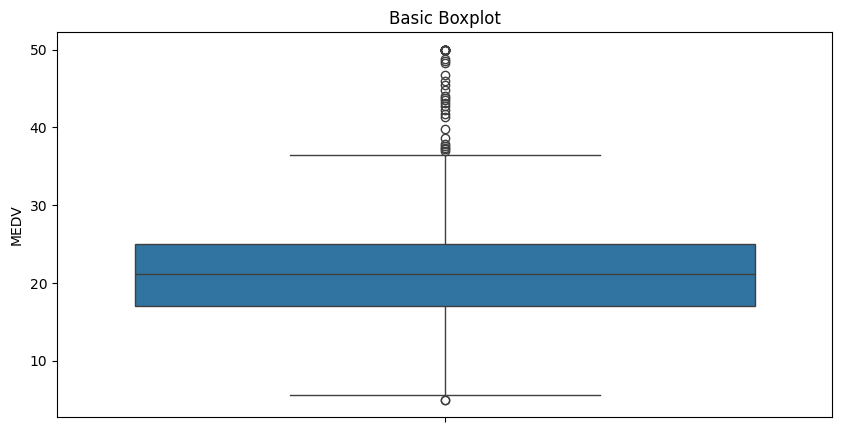

In [53]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(boston_df['MEDV']) 
plt.title('Basic Boxplot') 
plt.show()

<Figure size 1000x500 with 0 Axes>

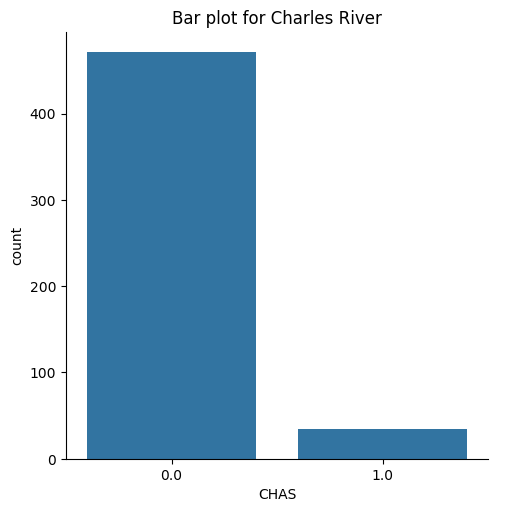

In [59]:
#Provide a  bar plot for the Charles river variable

plt.figure(figsize=(10,5))
#boston_df['CHAS'].value_counts().plot(kind='bar')
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Bar plot for Charles River') 
plt.show()

In [65]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE']>=70 , 'agegroup']='70 years and older'
boston_df.loc[boston_df['AGE']<=35 , 'agegroup']='35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70), 'agegroup']='between 35 and 70 years'

In [66]:
boston_df['agegroup'].value_counts()

agegroup
70 years and older         287
between 35 and 70 years    128
35 years and younger        91
Name: count, dtype: int64

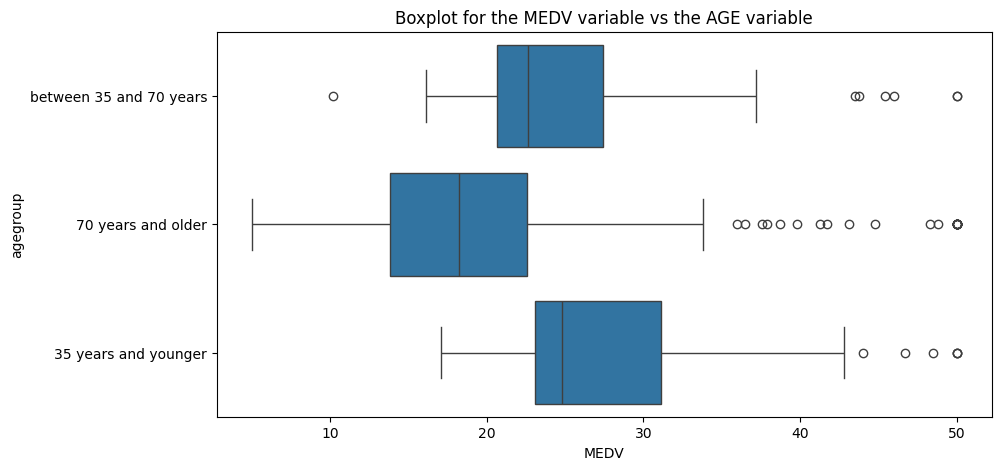

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df['MEDV'],y=boston_df['agegroup']) 
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

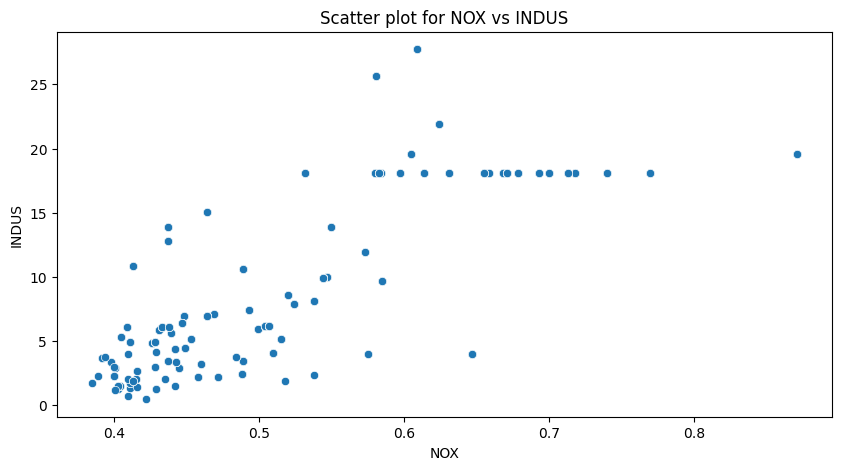

In [69]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the  
#proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df['NOX'],y=boston_df['INDUS']) 
plt.title("Scatter plot for NOX vs INDUS")
plt.show()

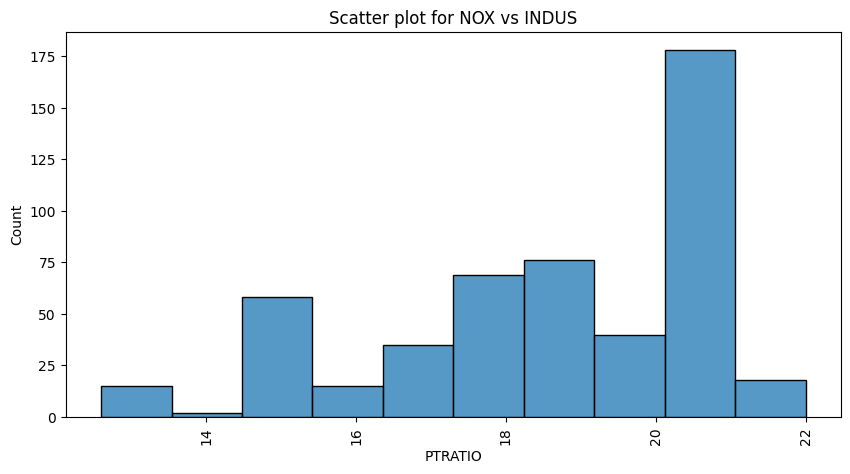

In [77]:
#Create a histogram for the pupil to teacher ratio variable i.e. PTRATIO 
plt.figure(figsize=(10,5))
#sns.catplot(x='PTRATIO', kind='count', data=boston_df)
sns.histplot(boston_df['PTRATIO'],bins=10, kde = False)
plt.xticks(rotation ='vertical')
plt.title("Histogram for NOX vs INDUS")
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

Null Hypothesis(
): Both average MEDV are the same

Alternative Hypothesis(
): Both average MEDV are NOT the same

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [81]:
boston_df['CHAS'].value_counts().reset_index()

,CHAS,count
0,0.0,471
1,1.0,35


In [82]:
# Levene's Test in Python to check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can not assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [104]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# since the p-value is less than 0.05 we reject null hypothesis as there is ofcourse a signigicatn difference in median value of houses bounded by the Charles river 

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [85]:
boston_df['agegroup'].value_counts().reset_index()

,agegroup,count
0,70 years and older,287
1,between 35 and 70 years,128
2,35 years and younger,91


In [88]:
low = boston_df.loc[boston_df["agegroup"] == '35 years and younger',"MEDV"]
mid = boston_df.loc[boston_df["agegroup"] == 'between 35 and 70 years',"MEDV"]
high = boston_df.loc[boston_df["agegroup"] == '70 years and older',"MEDV"]

In [94]:
low.size, mid.size, high.size

(91, 128, 287)

Null Hypothesis( ): the three population means are equal)

Alternative Hypothesis( ):  At least one of the means differ

In [103]:
f_statistic, p_value = scipy.stats.f_oneway(low,mid,high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# since p value is < 0.05, we can reject null hypothesis. At least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

 Null Hypothesis: NOX is not correlated with INDUS

 Alternative Hypothesis: NOX is correlated with INDUS

In [105]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
Null Hypothesis: DIS is not dependent upon MEDV

Alternative Hypothesis: DIS is dependent upon MEDV

In [108]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## adding an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        14:59:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
import math
math.sqrt(0.062)

0.24899799195977465

#### Conclusion: p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that weighted distances to five Boston employment centres are related to median value.
#### The square root of R-squared is 0.25, which implies postivie but weak correlation between DIS and MEDV